In [ ]:
import random
import numpy as np
import tensorflow as tf
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

In [ ]:
from keras.applications import MobileNetV2

input_shape = (224, 224, 3)

base_model=MobileNetV2(include_top=False,
                         weights="imagenet",
                         input_shape=input_shape)

base_model.summary()

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
len(base_model.layers)

In [ ]:
# تجميد جميع طبقات النموذج المدرب
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
import tensorflow as tf
from keras.layers import Input, Lambda, GlobalAveragePooling2D, Dropout, Dense
from keras.models import   Sequential
from keras.applications.mobilenet_v2 import preprocess_input

model = Sequential()

model.add(Input(shape=(32, 32, 3)))

target_size=(224, 224)

model.add(Lambda(lambda image: tf.image.resize(image, target_size)))

model.add(Lambda(lambda x: preprocess_input(x)))


model.add(base_model)


model.add(GlobalAveragePooling2D())


model.add(Dropout(0.3))


model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])




NameError: name 'base_model' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


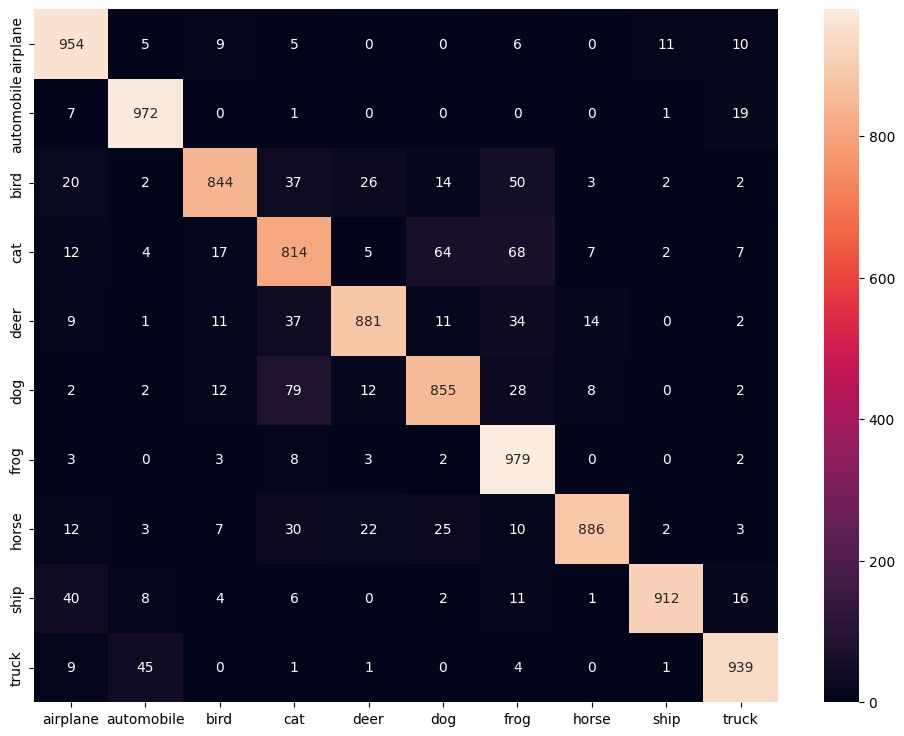

In [ ]:
model.save('models/cifar10_TL_trained_model.keras')

NameError: name 'model' is not defined

In [ ]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/Colab Notebooks/Hsoub/L4/models/cifar10_TL_trained_model.keras',safe_mode=False)

NameError: Exception encountered when calling layer "lambda_1" (type Lambda).

name 'preprocess_input' is not defined

Call arguments received by layer "lambda_1" (type Lambda):
  • inputs=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)
  • mask=None
  • training=None

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


num_images = 20
x_test_selected = X_test[num_images:num_images+num_images]
y_test_selected = y_test[num_images:num_images+num_images]


x_test_selected = x_test_selected


predictions = model.predict(x_test_selected)
predicted_labels = np.argmax(predictions, axis=1)


fig, axes = plt.subplots(4, 5, figsize=(12, 10))
axes = axes.ravel()

for i in range(num_images):

    axes[i].imshow(x_test_selected[i])
    axes[i].axis('off')


    predicted_label = class_names[predicted_labels[i]]
    true_label = class_names[y_test_selected[i][0]]

    if predicted_label == true_label:
        title_color = 'green'
    else:
        title_color = 'red'

    axes[i].set_title(f'Pred: {predicted_label}\nTrue: {true_label}', color=title_color)

plt.tight_layout()
plt.show()


In [ ]:
for i in range(10):
    image = X_test[i]
    label = class_names[y_test[i][0]]


    file_name = f'images\\image_{i}_label_{label}.png'
    plt.imsave(file_name, image)

In [ ]:
image_path = 'images\\image_1_label_ship.png'

In [ ]:

from keras.preprocessing.image import img_to_array, load_img
import numpy as np
image = load_img(image_path, target_size=(32, 32))
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)

In [ ]:
predictions = model.predict(image_array)

predicted_class = np.argmax(predictions[0])

predicted_label = class_names[predicted_class]

In [ ]:
plt.imshow(image)
plt.title(predicted_label)
plt.axis('off')
plt.show()